<a href="https://colab.research.google.com/github/Anacleide0803/MVP/blob/main/sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP de Análise de Dados e Boas Práticas

1. Escopo
Neste projeto sera usado o dataset proveniente das bases de dados que compoem o programa Farmacia Popular. Seu objetivo é identifica entre os pacientes beneficiario do bolsa familia, as principais patologias.

Definição do Problema

Analisar o conjunto de dados de uma mostragem aleatória simples de 10 mil registros e fazer inferências das pessoas que foram beneficiadas pelo Programa Farmácia Popular do Brasil com a aquisição de medicamentos gratuitos.

Premissas ou hipóteses do problema:

    somente os pacientes beneficiario do bolsa familia
    Patologias:hipertensão, diabetes, asma, osteoporose e contraceptivos.

Levantamento dos Requisitos e atributos:

As informações foram extraidas por amostragem de dez mil linhas dos sistemas do Programa Farmácia Popular do Brasil, gerido pela Coordenação-Geral do Programa Farmácia Popular e pelo DATASUS. São totalizadas todas as compras realizadas nas farmácias conveniadas de determinado município. Em seguida são contados os CPF únicos que realizaram as compras (titulares das receitas médicas) para identificar a quantidade de pessoas que foram beneficiadas. Os dados são vinculados ao município onde está localizada a farmácia, na qual foi feita a aquisição do medicamento.

Informações sobre as variaveis:

    REGIAO - do paciente
    QT_MEDICAMENTO - quantidade de medicamento adquirido. ex: uma cartela contendo 30 comprimido = QT_MEDICAMENTO = 30.
    QTD_PACIENTE - quantidade de paciente
    PATOLOGIA - referente a patologia adquirida (ex: asma, diabetes, hipertenção)
    SEXO - sexo do paciente
    IDADE - idade do paciente
    COR - cor do paciente




2. Será utilizado o pacote Pandas (Python Data Analysis Library) para carregar o   arquivo .csv disponivel no repositorio Git: https://raw.githubusercontent.com/Anacleide0803/MVP/main/Bfamilia.csv


As bibliotecas utilizadas neste projeto foram:

    numpy
    pandas
    matplotlib
    seaborn
    plotly
    plotly
    plotly
    sklearn
    plotly
    warnings



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import sklearn
import plotly.express as ex
import warnings
warnings.filterwarnings('ignore')

**Baixando o csv do GIT e lê as colunas informadas no dataset = Bfamilia_csv(url, names=colunas, skiprows=1, delimiter=',')**

In [ ]:
import pandas as pd
import requests
import io
url='https://raw.githubusercontent.com/Anacleide0803/MVP/main/Bfamilia.csv'
dowload=requests.get(url).content # Baixando o csv do Git
dfBfamilia=pd.read_csv(io.StringIO(dowload.decode('latin-1'))) # Lê o conteudo do arquivo e transforma em um pandas data frame.
dfBfamilia.head(10) # Lê as 10 primeiras linhas

,REGIAO,QT_MEDICAMENTO,QTD_PACIENTE,PATOLOGIA,SEXO,IDADE,COR
0,SUDESTE,1,1,HIPERTENSAO,F,65,PARDA
1,SUDESTE,1,1,HIPERTENSAO,F,49,AMARELA
2,SUDESTE,1,1,OSTEOPOROSE,F,49,AMARELA
3,SUDESTE,2,2,HIPERTENSAO,F,66,AMARELA
4,SUDESTE,2,1,DIABETES,F,66,AMARELA
5,SUDESTE,1,1,HIPERTENSAO,F,50,SEM INFORMACAO
6,SUDESTE,2,1,HIPERTENSAO,F,50,SEM INFORMACAO
7,SUDESTE,2,1,HIPERTENSAO,F,50,SEM INFORMACAO
8,SUDESTE,1,1,HIPERTENSAO,M,55,BRANCA
9,SUDESTE,2,1,HIPERTENSAO,F,63,SEM INFORMACAO


**3. Análisando o  Dados**  
3.1. Estatísticas Descritivas-
Analisando as dimensões, média, mediana, dispersão, desvio padrão e os  e quartis para identificar padrões e relacionamentos do conjunto de dados

In [ ]:
# Classificação do tipo de dado dos atributos
numRows, numColumns = dfBfamilia.shape
columns_names = list(dfBfamilia.columns)
print("Número de linhas: ", numRows, "\nNúmero de colunas: ", numColumns) # Retorna a quantidade de linhas do dataset
print("Nome das colunas: ", columns_names) # Retorna a quantidade de colunas  do dataset
num_features = list(dfBfamilia.select_dtypes(include=np.number).columns) # Retorna os nomes das colunas numéricas do dataset
cat_features = list(np.setdiff1d(columns_names,num_features)) # Retorna a lista com nome das colunas categoricas

print("Atributos Numéricos: ", num_features, "\nAtributos Categóricos: ", cat_features)

Número de linhas:  8452 
Número de colunas:  7
Nome das colunas:  ['REGIAO', 'QT_MEDICAMENTO', 'QTD_PACIENTE', 'PATOLOGIA', 'SEXO', 'IDADE', 'COR']
Atributos Numéricos:  ['QT_MEDICAMENTO', 'QTD_PACIENTE', 'IDADE'] 
Atributos Categóricos:  ['COR', 'PATOLOGIA', 'REGIAO', 'SEXO']


In [ ]:
# Analisando os tipos das variaveis e se possui valores nulos ou missing.
print(dfBfamilia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8452 entries, 0 to 8451
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   REGIAO          8452 non-null   object
 1   QT_MEDICAMENTO  8452 non-null   int64 
 2   QTD_PACIENTE    8452 non-null   int64 
 3   PATOLOGIA       8452 non-null   object
 4   SEXO            8452 non-null   object
 5   IDADE           8452 non-null   int64 
 6   COR             8452 non-null   object
dtypes: int64(3), object(4)
memory usage: 462.3+ KB
None


In [ ]:
# O tipo de dado de cada atributo
dfBfamilia.dtypes

REGIAO            object
QT_MEDICAMENTO     int64
QTD_PACIENTE       int64
PATOLOGIA         object
SEXO              object
IDADE              int64
COR               object
dtype: object

In [ ]:
# resumo estatístico do conjunto de dados (média, desvio padrão, mínimo, máximo e os quartis)
dfBfamilia.describe()

,QT_MEDICAMENTO,QTD_PACIENTE,IDADE
count,8452.000000,8452.000000,8452.000000
mean,1.910317,1.183152,53.997752
std,0.979618,0.417701,8.223975
min,1.000000,1.000000,13.000000
25%,1.000000,1.000000,49.000000
50%,2.000000,1.000000,55.000000
75%,2.000000,1.000000,60.000000
max,10.000000,4.000000,80.000000


Ressalta-se com base no coeficiente de variação (51.28%) que a variavel QT_MEDICAMENTO apresenta  variabilidade em torno da media e  com base na mediana (segundo quartil) tem-se que 50% da quantidade de medicamento estão abaixo de 2.000 e a outra metade tem uma quantidade maior que 60%.
obserserva-se que a idade mediana dos pacientes e de 55 anos e maior idade observada é 80 anos e a menor idade observada é 13 anos.
Os dados estão mais concentrados em torno da media (coeficiente de variação = 15.23%)

In [ ]:
# Calculando o coeficiente de dispessão
cv=lambda x: np.std(x,ddof=1)/np.mean(x)*100
cv(dfBfamilia)

QT_MEDICAMENTO    51.280407
QTD_PACIENTE      35.304089
IDADE             15.230218
dtype: float64

**Grafico de *histograma* para visualizar a distribuição de dados de frequência quantitativos.**

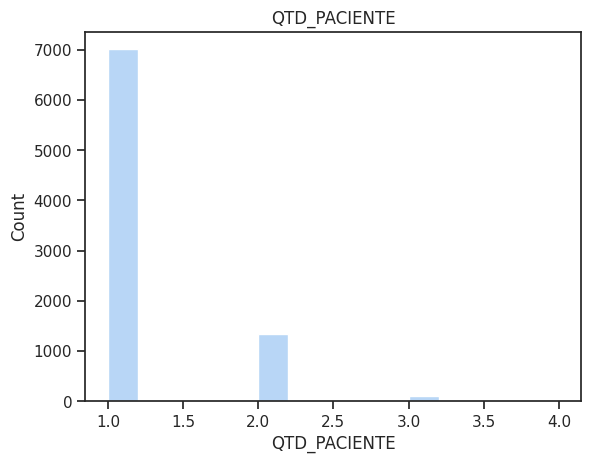

In [ ]:
# Histograma com base na quantidade de paciente
plt.title('QTD_PACIENTE')
sns.histplot(dfBfamilia.QTD_PACIENTE, bins=15)
plt.show()

Observa-se que as medidas de tendência central para a quantidade paciente
* Média: 1.18
* Mediana: 1.0
* Moda: 0    1

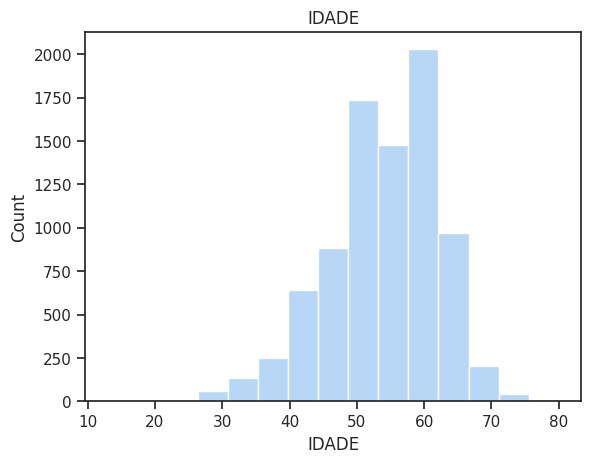

In [ ]:
# Histograma com base na idade dos pacientes
plt.title('IDADE')
sns.histplot(dfBfamilia.IDADE, bins=15)
plt.show()

Observa-se que os dados apresentam assimetria a esquerda e nota-se que a mediana é maior que a media.

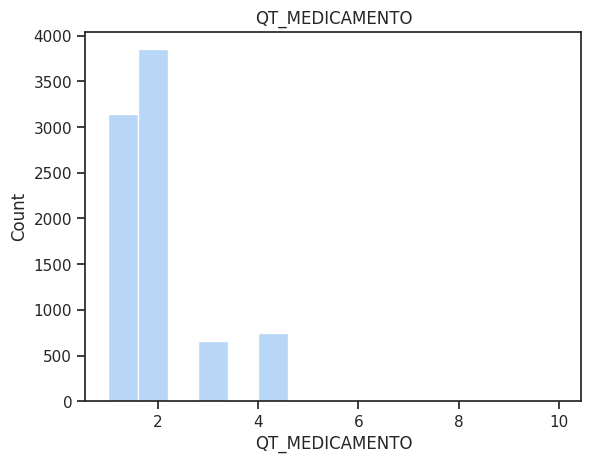

In [ ]:
# Histograma com base na quantidade de medicamento
plt.title('QT_MEDICAMENTO')
sns.histplot(dfBfamilia.QT_MEDICAMENTO, bins=15)
plt.show()

Os dados apresentam assimetria a direita e pelos mesmos 50% dos dados / pacientes pegam pelos menos 2 medicamentos

**Visualização dos valores para as colunas numéricas**

<Axes: title={'center': 'IDADE'}, ylabel='IDADE'>

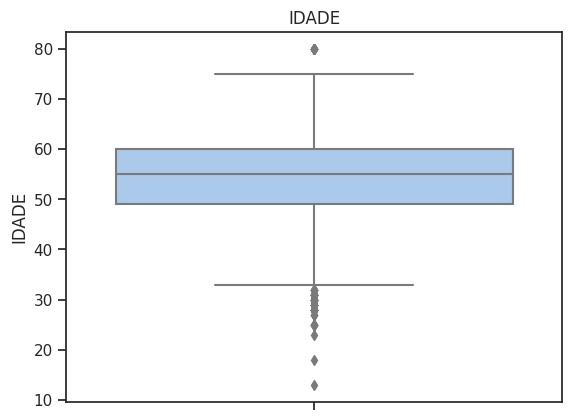

In [ ]:
# Criando boxplot baseado na idade dos pacientes

plt.title("IDADE")
sns.boxplot(y= 'IDADE', data= dfBfamilia )

observa-se que existem a presença de muitos valores discrepante nos dados idades inferiores a 32,5 anos.


<Axes: title={'center': 'QT_MEDICAMENTO'}, ylabel='QT_MEDICAMENTO'>

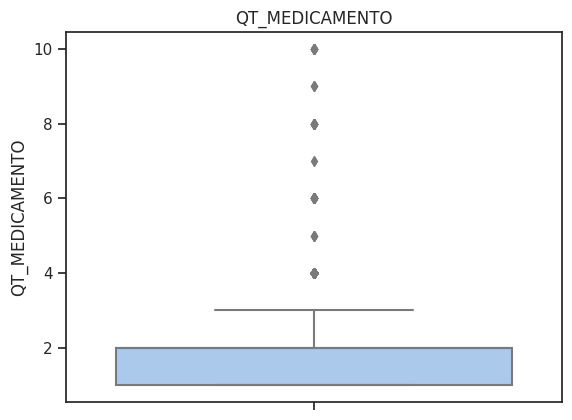

In [ ]:
# Boxplot da distribuição da quantidade de medicamento

plt.title("QT_MEDICAMENTO")
sns.boxplot(y= 'QT_MEDICAMENTO', data= dfBfamilia )

observa-se que existem a presença de alguns valores discrepante nos dados quantidade de medicamentos com a mediana superiores  a 3,5


**Analise das distribuição bidimensional**

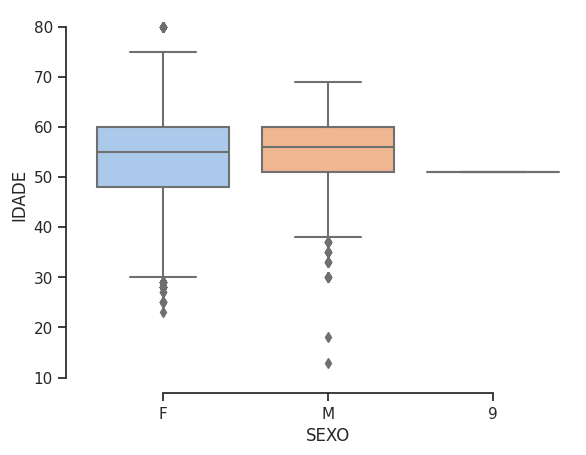

In [ ]:
# Boxplot de agrupamento da da idade em relação ao sexo
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="SEXO",y="IDADE",
              data=dfBfamilia)
sns.despine(offset=10, trim=True)

observa-se que a idade maxima é 80 anos e que a media de idade para os pacientes do sexo (F) é de 52 anos e 60 para o sexo (M) existem a presença de alguns valores classificados como (9) são os pacientes que não informaram o sexo no momomento da aquisição.

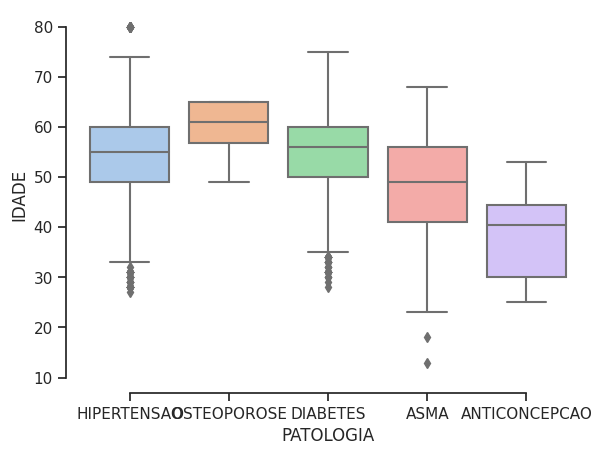

In [ ]:
# Bloxpot para a variável patologia por idade
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="PATOLOGIA",   y="IDADE",
              data=dfBfamilia)
sns.despine(offset=10, trim=True)

observa-se que a idade tem influencia sobre a patologia do paciente, sendo os pacientes de HIPERTECAO com idade de 80 anos e Diabetes com 75 anos

In [ ]:
print(dfBfamilia.groupby('PATOLOGIA').describe())

              QT_MEDICAMENTO                                                \
                       count      mean       std  min  25%  50%  75%   max   
PATOLOGIA                                                                    
ANTICONCEPCAO           60.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0   
ASMA                   391.0  2.314578  1.864862  1.0  1.0  2.0  2.0  10.0   
DIABETES              2287.0  2.439878  1.059780  1.0  2.0  2.0  3.0   9.0   
HIPERTENSAO           5692.0  1.682888  0.740264  1.0  1.0  2.0  2.0   6.0   
OSTEOPOROSE             22.0  1.000000  0.000000  1.0  1.0  1.0  1.0   1.0   

              QTD_PACIENTE            ...             IDADE             \
                     count      mean  ...  75%  max   count       mean   
PATOLOGIA                             ...                                
ANTICONCEPCAO         60.0  1.000000  ...  1.0  1.0    60.0  38.466667   
ASMA                 391.0  1.127877  ...  1.0  2.0   391.0  48.109974   
DIABE

Visualizando a distribuição dos valores para as colunas categoricas

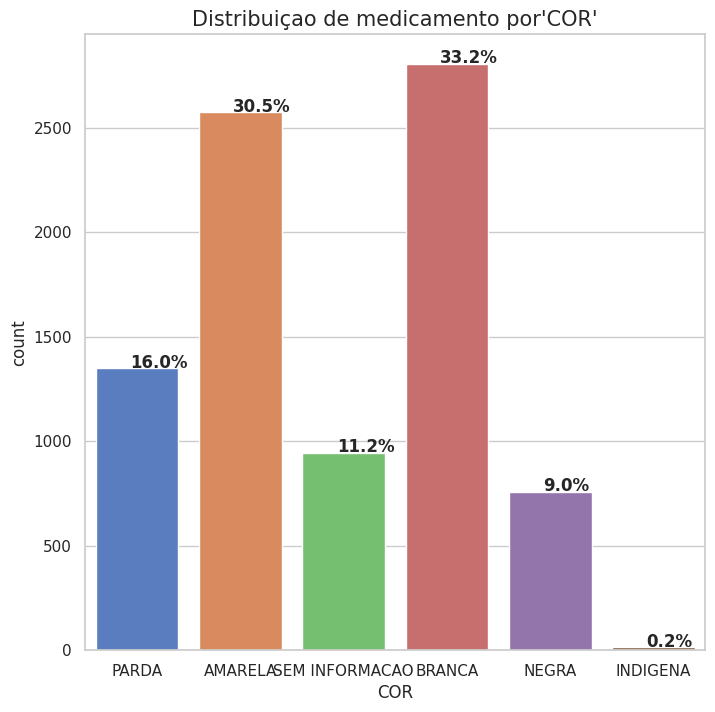

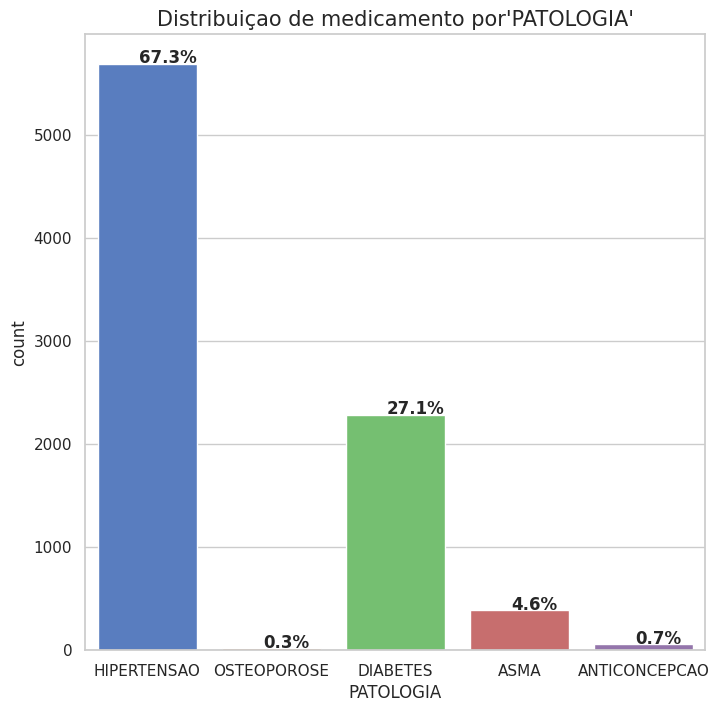

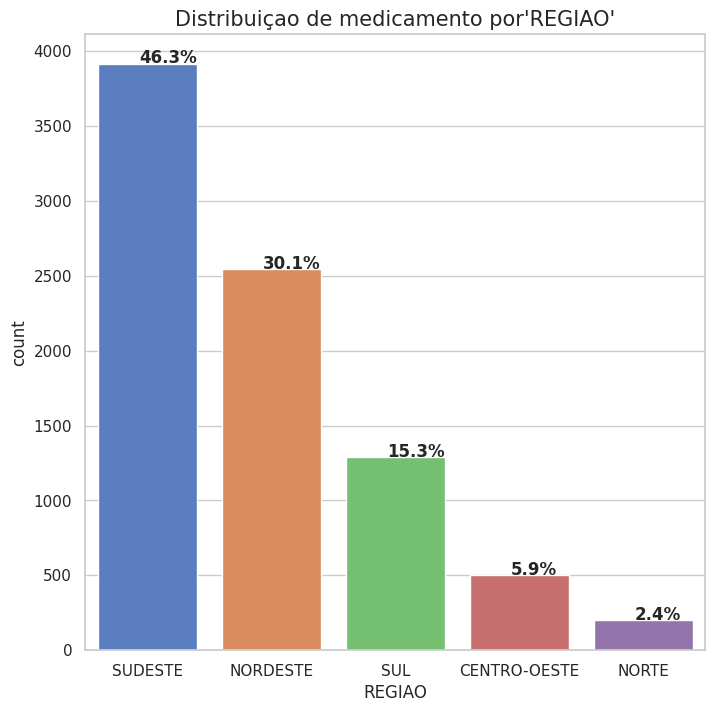

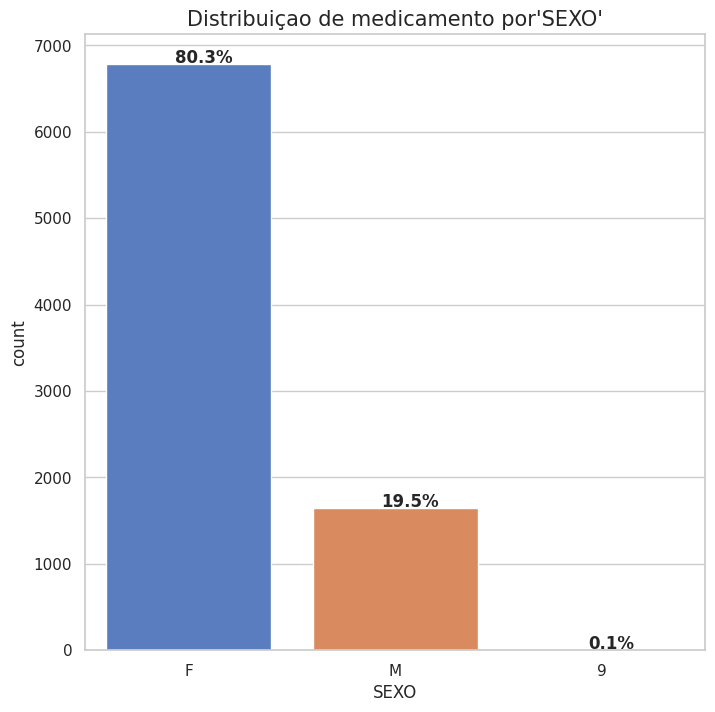

In [ ]:
# Visualizando a distribuição dos valores para as colunas categóricas
for cat_feature in cat_features:

    plt.figure(figsize=(8,8))
    sns.set_style("whitegrid")
    ax = sns.countplot(x = dfBfamilia[cat_feature],label="Count", palette = "muted")
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2.4,rect.get_height()+2,"%.1f%%"% (rect.get_height()/ numRows *100),
                 weight='bold', fontsize = 12 )
    plt.title("Distribuiçao de medicamento por'" + str(cat_feature) + "'", fontsize = 15)

Observa-se que os indigenas representam 0,2% seguido de negros 9% do percentual de distribuição de medicamentos e 0,1% não possuem definição de SEXO e estão categorizado como (9).